In [1]:
import numpy as np
import module1

import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 6)
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


## Load and view data

Data obtained from Yahoo! Finance (https://finance.yahoo.com/).

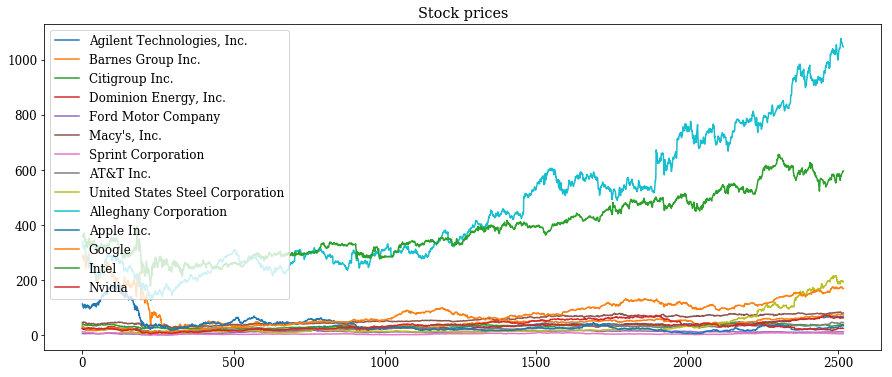

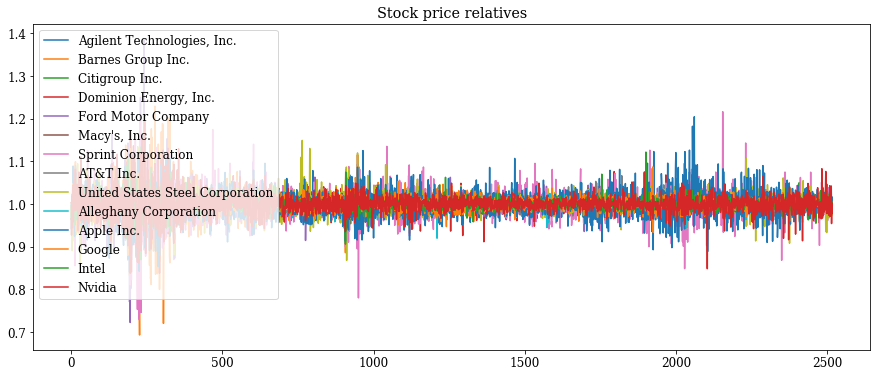

In [2]:
data = module1.load_data('./Stock_data.pkl')
stock_names = data['stock names']
price_relatives = data['price relatives']
prices = data['prices']

i = 0
for key in stock_names:
    plt.plot(prices[i], label=stock_names[key])
    i+=1   
plt.legend(loc = 2)
plt.title(r'Stock prices');

plt.figure()
i = 0
for key in stock_names:
    plt.plot(price_relatives[i], label=stock_names[key])
    i+=1   
plt.legend(loc = 2)
plt.title(r'Stock price relatives');

### Approximate optimal CRP in hindsight

In [4]:
res1, res2 = module1.approx_optimal_CRP(price_relatives[[0,1,2],:], N=50000)
print("Optimal portfolio for the stocks = ", res1)
print("Gain = ", res2)

Optimal portfolio for the stocks =  [9.94219570e-01 7.19412995e-04 5.06101736e-03]
Gain =  4.347173604500681


### Approximate Universal Portfolio algorithm


In [5]:
res = module1.approx_UP(price_relatives[[0,1],:], alpha=0.5, N=50000)
print("Gain from approximate universal portfolio algorithm = ",res)

Gain from approximate universal portfolio algorithm =  4.051810636155725


## Funtion to implement UP and adaptive UP at each day and find results

Wealth ratio =  0.9509138138206651


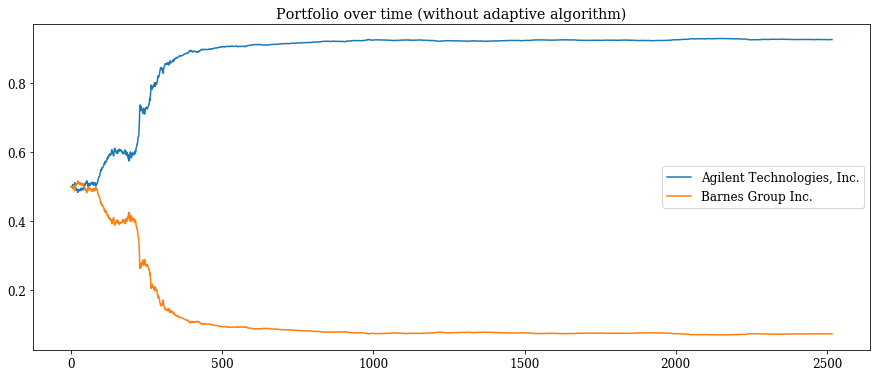

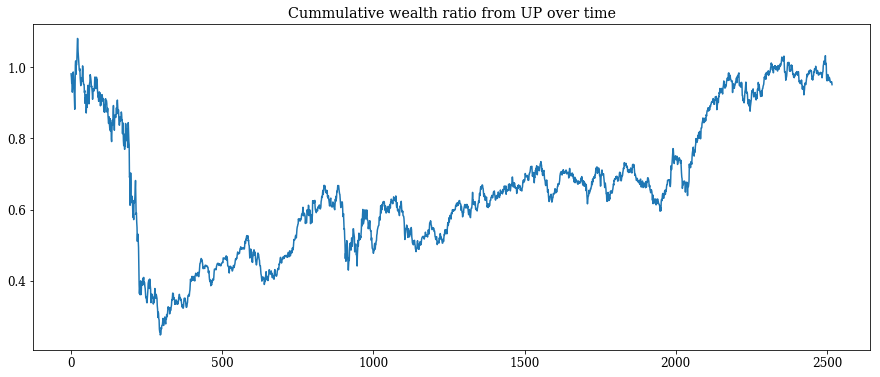

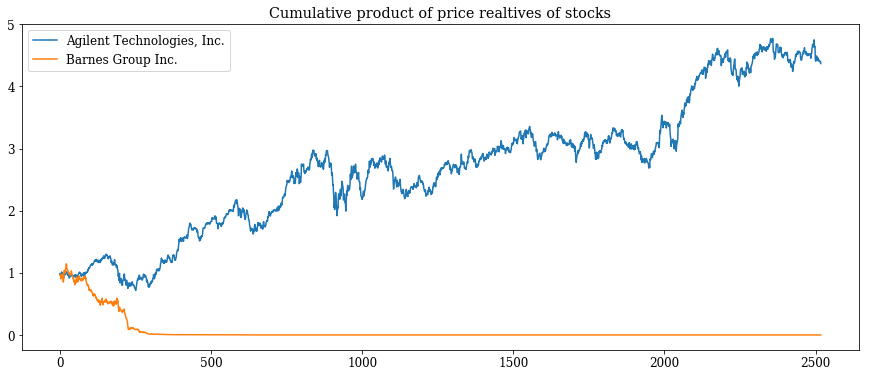

In [6]:
idx = [0,1]
w,r,ws = module1.approx_UP_advanced(price_relatives[idx,:], alpha=0.5, N=50000)
print('Wealth ratio = ',w)

names = np.array( list( stock_names.values() ) )[idx]
for i in range(r.shape[1]):
    plt.plot(r[:,i],label = names[i])
plt.legend()
plt.title('Portfolio over time (without adaptive algorithm)')
plt.show()

plt.plot(np.cumprod(ws) )
plt.title('Cummulative wealth ratio from UP over time')
plt.show()

for i in range(r.shape[1]):
    plt.plot(np.cumprod(price_relatives[idx,:],axis = 1)[i],label =  names[i])
plt.legend()
plt.title('Cumulative product of price realtives of stocks')
plt.show()

The adaptive algorithm is has lower latency than Cover's algorithm, and as a result, can respond to changes in stock price relatives quickly.

It is implemented using another papramter, w, which weights each potfolio, where porfolios with larger wealth ratio would get more weight and weights add upto one ( w = welth ratio from portfolio / sum of wealth ratio from all portfolios)

## Performance of different constant rebalance portfolios (CRP) and universal portfolio (UP) algorithm on two stocks

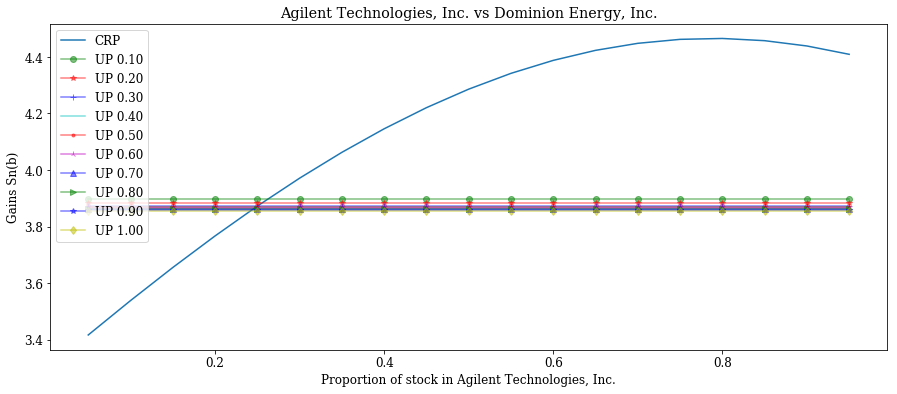

CPU times: user 11.4 s, sys: 4.24 s, total: 15.7 s
Wall time: 12.4 s


In [8]:
%%time
idx1 = [0,3] # [0,3],[1,6],[2,9], [3,5], [4,6]
stocks = price_relatives[idx1,:]
names = np.array( list( stock_names.values() ) )[idx1]
alphas = np.arange(0.1,1.1,0.1)
snlist = []
UPlist = []
plist = np.arange(0.05,1,0.05)
for p in plist:
    a = np.array([p,1-p])
    temp = np.prod( a@stocks )
    snlist.append(temp)
plt.plot(plist, snlist, label = 'CRP')    

crp, crp_wealth = module1.approx_optimal_CRP(stocks,N=50000)
linestyles1 = ['-go','-r*','-b+','c-','-r.','-m2','-b^','-g>', '-b*','-yd']
for i,alpha in enumerate(alphas) :
    temp = module1.approx_UP(stocks,alpha = alpha,N=50000)
    UPlist.append( temp ) 
    plt.plot(plist, [temp]*len(plist), linestyles1[i],label = 'UP {0:2.2f}'.format(alpha),alpha = 0.5)

plt.xlabel('Proportion of stock in '+names[0])
plt.ylabel('Gains Sn(b)')
plt.title(names[0]+' vs ' +names[1])
plt.legend()
plt.show()

## Three stocks

For stocks Alleghany Corporation, Dominion Energy, Inc., Ford Motor Company
Wealth from approximate optimal CRP = 3.275049619327337

Wealth using approx_UP
Wealth from UP 0.10 = 2.7529
Wealth from UP 0.20 = 2.5964
Wealth from UP 0.30 = 2.4555
Wealth from UP 0.40 = 2.3557
Wealth from UP 0.50 = 2.2571
Wealth from UP 0.60 = 2.1774
Wealth from UP 0.70 = 2.1153
Wealth from UP 0.80 = 2.0627
Wealth from UP 0.90 = 1.9925
Wealth from UP 1.00 = 1.9600

Wealth using adaptive approx_UP (portfolio calculated each day)
Wealth from adaptive UP 0.10 = 1.4307
Wealth from adaptive UP 0.20 = 1.2364
Wealth from adaptive UP 0.30 = 1.0862
Wealth from adaptive UP 0.40 = 0.9895
Wealth from adaptive UP 0.50 = 0.9014
Wealth from adaptive UP 0.60 = 0.8275
Wealth from adaptive UP 0.70 = 0.7812
Wealth from adaptive UP 0.80 = 0.7253
Wealth from adaptive UP 0.90 = 0.6826
Wealth from adaptive UP 1.00 = 0.6531
CPU times: user 2min 40s, sys: 15.2 s, total: 2min 55s
Wall time: 2min 53s


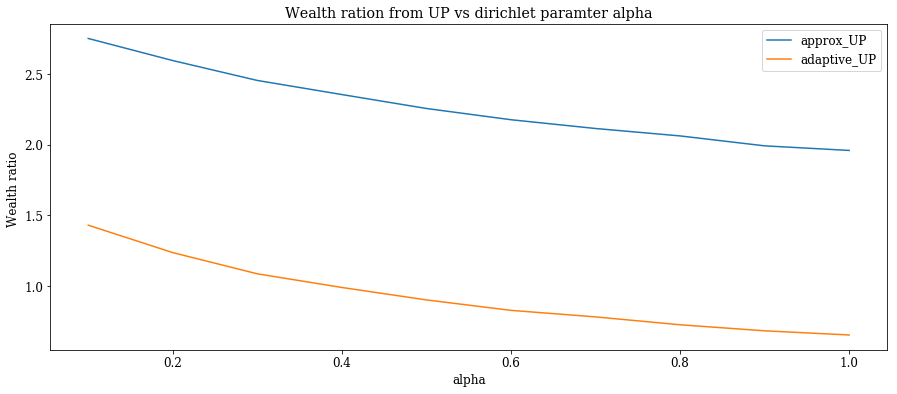

In [10]:
%%time
idx1 = [9,3,4]
stocks = price_relatives[idx1,:]
names = np.array( list( stock_names.values() ) )[idx1]
alphas = np.arange(0.1,1.1,0.1)

crp, crp_wealth = module1.approx_optimal_CRP(stocks,N=50000)
print('For stocks {0:}, {1:}, {2:}'.format(names[0],names[1],names[2]))
print('Wealth from approximate optimal CRP = '+ str(crp_wealth) )
print('\nWealth using approx_UP')
UPlist = []
for alpha in alphas:
    temp = module1.approx_UP(stocks,alpha = alpha,N=50000)
    UPlist.append( temp )
    print('Wealth from UP {0:2.2f} = {1:2.4f}'.format(alpha,temp ) )

print('\nWealth using adaptive approx_UP (portfolio calculated each day)')
UPlist1 = []
for alpha in alphas:
    temp,_,_ = module1.approx_UP_advanced(stocks,alpha = alpha,N=50000,adap='on')
    UPlist1.append( temp )
    print('Wealth from adaptive UP {0:2.2f} = {1:2.4f}'.format(alpha,temp ) )

plt.plot(alphas, UPlist,label='approx_UP' )
plt.plot(alphas, UPlist1,label='adaptive_UP' )
plt.xlabel('alpha')
plt.ylabel('Wealth ratio ')
plt.legend()
plt.title('Wealth ration from UP vs dirichlet paramter alpha')

## Four stocks


For stocks Intel, United States Steel Corporation, Google, Sprint Corporation,

Wealth from approximate optimal CRP = 1.9312348127220218
Wealth from UP 0.10 = 1.3610
Wealth from UP 0.20 = 1.2995
Wealth from UP 0.30 = 1.2528
Wealth from UP 0.40 = 1.2149
Wealth from UP 0.50 = 1.1893
Wealth from UP 0.60 = 1.1630
Wealth from UP 0.70 = 1.1455
Wealth from UP 0.80 = 1.1306
Wealth from UP 0.90 = 1.1138
Wealth from UP 1.00 = 1.0999

Wealth using adaptive approx_UP (portfolio calculated each day)
Wealth from adaptive UP 0.10 = 0.8873
Wealth from adaptive UP 0.20 = 0.8395
Wealth from adaptive UP 0.30 = 0.8009
Wealth from adaptive UP 0.40 = 0.7668
Wealth from adaptive UP 0.50 = 0.7389
Wealth from adaptive UP 0.60 = 0.7146
Wealth from adaptive UP 0.70 = 0.6932
Wealth from adaptive UP 0.80 = 0.6766
Wealth from adaptive UP 0.90 = 0.6619
Wealth from adaptive UP 1.00 = 0.6461
CPU times: user 2min 39s, sys: 20.4 s, total: 2min 59s
Wall time: 2min 52s


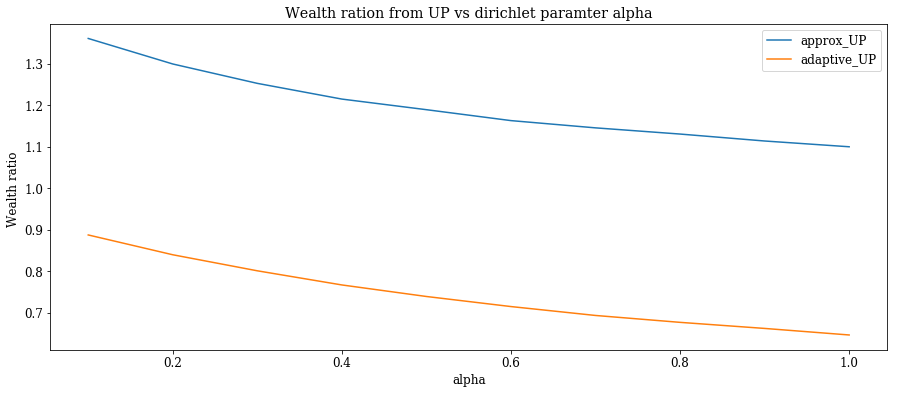

In [11]:
%%time
# Problem 3b
idx1 = [12,8,11,6]
stocks = price_relatives[idx1,:]
names = np.array( list( stock_names.values() ) )[idx1]
alphas = np.arange(0.1,1.1,0.1)

crp, crp_wealth = module1.approx_optimal_CRP(stocks,N=50000)
print('For stocks {0:}, {1:}, {2:}, {3:},'.format(names[0],names[1],names[2],names[3]))
print('\nWealth from approximate optimal CRP = '+ str(crp_wealth) )

UPlist = []
for alpha in alphas:
    temp = module1.approx_UP(stocks,alpha = alpha,N=50000)
    print('Wealth from UP {0:2.2f} = {1:2.4f}'.format(alpha,temp ) )
    UPlist.append(temp)

print('\nWealth using adaptive approx_UP (portfolio calculated each day)')
UPlist1 = []
for alpha in alphas:
    temp,_,_ = module1.approx_UP_advanced(stocks,alpha = alpha,N=50000,adap='on')
    UPlist1.append( temp )
    print('Wealth from adaptive UP {0:2.2f} = {1:2.4f}'.format(alpha,temp ) )

plt.plot(alphas, UPlist,label='approx_UP' )
plt.plot(alphas, UPlist1,label='adaptive_UP' )
plt.xlabel('alpha')
plt.ylabel('Wealth ratio ')
plt.legend()
plt.title('Wealth ration from UP vs dirichlet paramter alpha')